# **Project 12: Customer Segmentation Predictor**

***NumPy*** : *A Python library for numerical computing that provides support for arrays, matrices, and high-level mathematical functions.*

***Pandas*** : *A powerful Python library for data manipulation and analysis, offering data structures like DataFrame and Series for easy handling of structured data.*

***Matplotlib*** : *A comprehensive Python library for creating static, interactive, and animated visualizations, enabling users to generate plots, charts, and graphs.*

***Seaborn*** : *A statistical data visualization library built on top of Matplotlib, providing a high-level interface for drawing attractive and informative statistical graphics.*

***Scikit-learn (sklearn)*** : *A versatile Python library for machine learning that offers simple and efficient tools for data mining and data analysis, including various algorithms for classification, regression, clustering, and dimensionality reduction.*

***Warnings*** : *A general alert that something unexpected happened, but the program can still run.*

# **Data Loading**

**Importing these libraries for Data Loading, Data Visualization, and Data Cleaning.**

**warnings.simplefilter("ignore") — Completely suppresses all warnings so they are not shown during program execution.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter("ignore")

**This code reads a CSV file named "Customer Segmentation.csv" into a Pandas DataFrame called "CS" and displays the first 5 rows.**

In [2]:
CS = pd.read_csv("/content/Customer Segmentation.csv")
CS.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


**This command displays concise summary information about the DataFrame "CS", including the data types of columns and memory usage.**

In [3]:
CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


**This command generates descriptive statistics of the numerical columns in the DataFrame "CS", such as count, mean, standard deviation, minimum, and maximum values, along with quartile information.**

In [4]:
CS.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# **Data Cleaning**

**This command calculates the sum of missing values (NaN) for each column in the DataFrame "CS".**

In [5]:
CS.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


**This command returns the dimensions (number of rows and columns) of the DataFrame "CS".**

In [6]:
CS.shape

(8068, 11)

**This command drops rows with any missing values (NaN) from the DataFrame "CS" and assigns the resulting DataFrame back to "CS".**

In [7]:
CS = CS.dropna()

**After dropping the rows with missing values, this command checks and returns the sum of missing values (NaN) for each column in the DataFrame "CS", which should ideally be zero if all missing values were successfully removed.**

In [8]:
CS.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,0
Age,0
Graduated,0
Profession,0
Work_Experience,0
Spending_Score,0
Family_Size,0
Var_1,0


# **Data Visualization**

**This code generates a figure with three subplots, each displaying a distribution plot (histogram) of the variables "Age", "Work_Experience", and "Family_Size" from the DataFrame "CS" using Seaborn's "distplot" function.**

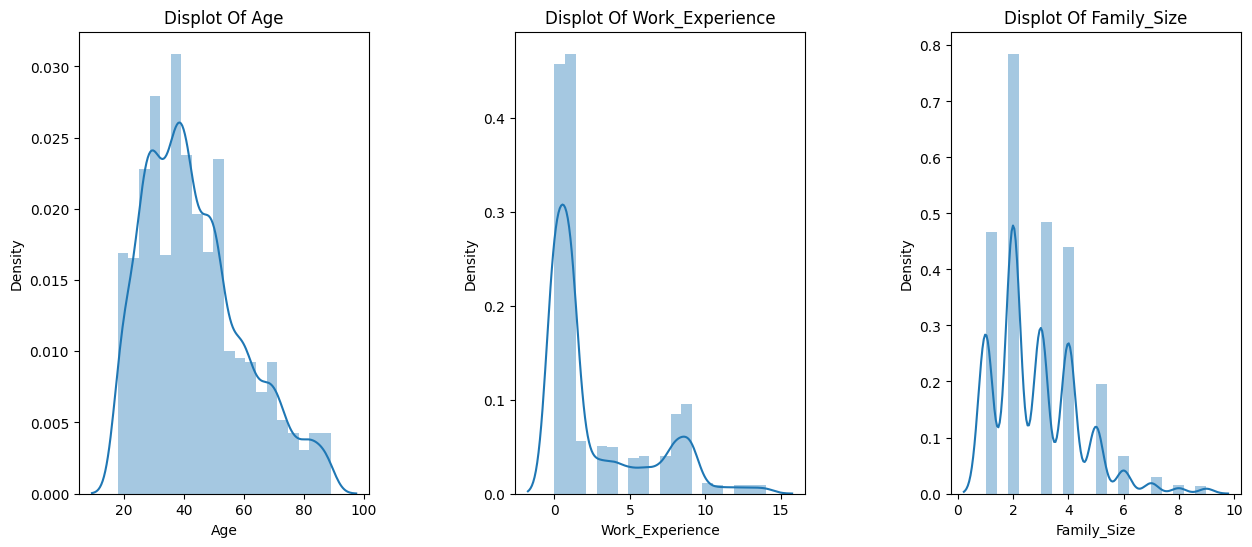

In [9]:
plt.figure(1, figsize= (15, 6))
n = 0
for x in ["Age", "Work_Experience", "Family_Size"]:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.distplot(CS[x], bins = 20)
    plt.title("Displot Of {}".format(x))

plt.show()

**This command groups the DataFrame "CS" by the column "Segmentation" and calculates the mean values of the columns "Age", "Work_Experience", and "Family_Size" for each group.**

In [10]:
CS.groupby("Segmentation")[["Age", "Work_Experience", "Family_Size"]].agg("mean")

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.421411,2.888614,2.431931
B,48.113232,2.393766,2.682570
C,49.327907,2.224419,2.961628
D,32.956744,2.997154,3.241320


**This code groups the DataFrame "CS" by the column "Segmentation", calculates the mean values of the columns "Age", "Work_Experience", and "Family_Size" for each group, and then plots a bar chart representing these mean values for each segmentation category.**

<Axes: xlabel='Segmentation'>

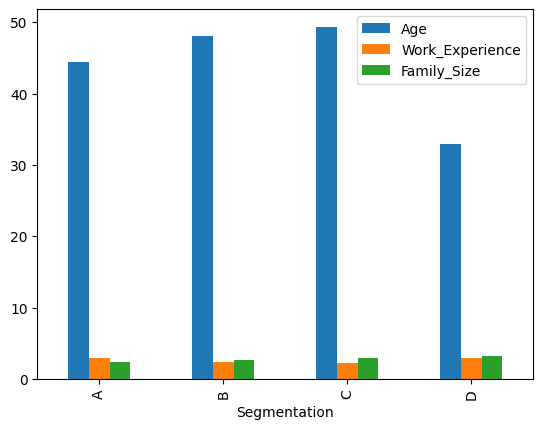

In [11]:
CS.groupby('Segmentation')[[ 'Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'bar')

**This command groups the DataFrame "CS" by the column "Gender" and calculates the mean values of the columns "Age", "Work_Experience", and "Family_Size" for each gender group.**

In [12]:
CS.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean')

,Age,Work_Experience,Family_Size
Gender,,,
Female,43.146252,2.826640,2.742972
Male,43.852869,2.468589,2.920859


**This code groups the DataFrame "CS" by the column "Gender", calculates the mean values of the columns "Age", "Work_Experience", and "Family_Size" for each gender group, and then plots a bar chart representing these mean values for each gender category.**

<Axes: xlabel='Gender'>

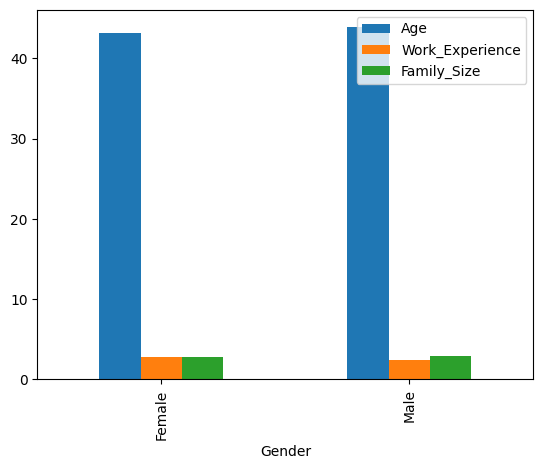

In [13]:
CS.groupby('Gender')[['Age','Work_Experience','Family_Size']].agg('mean').plot(kind = 'bar')

**This command groups the DataFrame "CS" by the columns "Profession" and "Gender", and then counts the occurrences of "Gender" within each group.**

In [14]:
CS.groupby(["Profession", "Gender"])[["Gender"]].count()

Gender
Profession    Gender        
Artist        Female    1055
              Male      1137
Doctor        Female     257
              Male       335
Engineer      Female     466
              Male       116
Entertainment Female     214
              Male       595
Executive     Female      22
              Male       483
Healthcare    Female     446
              Male       631
Homemaker     Female     144
              Male        31
Lawyer        Female     256
              Male       244
Marketing     Female     128
              Male       105

**This code groups the DataFrame "CS" by the columns "Profession" and "Gender", counts the occurrences of "Gender" within each group, and then plots a bar chart representing these counts for each combination of profession and gender.**

<Axes: xlabel='Profession,Gender'>

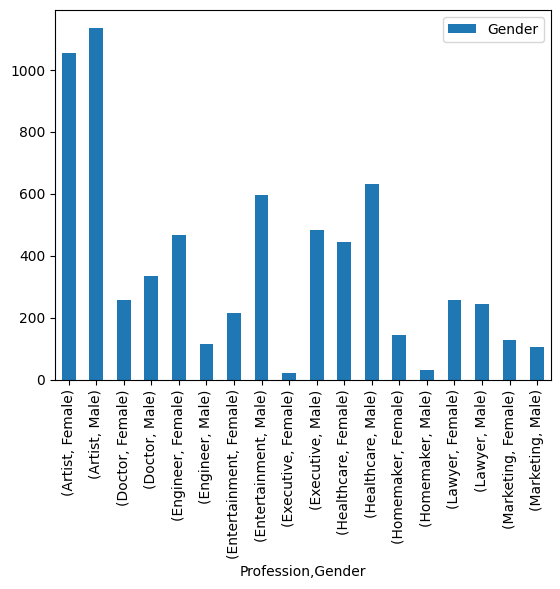

In [15]:
CS.groupby(['Profession','Gender'])[['Gender']].count().plot(kind= 'bar')

**This command groups the DataFrame "CS" by the columns "Gender" and "Spending_Score", and then counts the occurrences of "Spending_Score" within each group.**

In [16]:
CS.groupby(["Gender", "Spending_Score"])[["Spending_Score"]].count()

Spending_Score
Gender Spending_Score                
Female Average                    692
       High                       393
       Low                       1903
Male   Average                    970
       High                       611
       Low                       2096

**This code groups the DataFrame "CS" by the columns "Gender" and "Spending_Score", counts the occurrences of "Spending_Score" within each group, and then plots a bar chart representing these counts for each combination of gender and spending score.**

<Axes: xlabel='Gender,Spending_Score'>

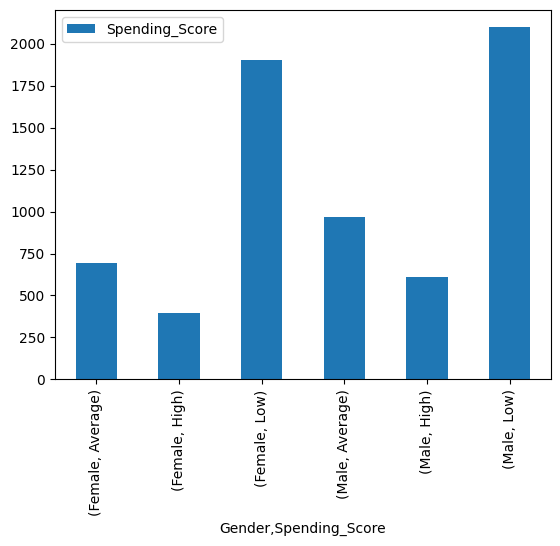

In [17]:
CS.groupby(["Gender", "Spending_Score"])[["Spending_Score"]].count().plot(kind = "bar")

**This command creates a pairwise scatterplot matrix using Seaborn's "pairplot" function, showing the relationships between all numerical variables in the DataFrame "CS".**

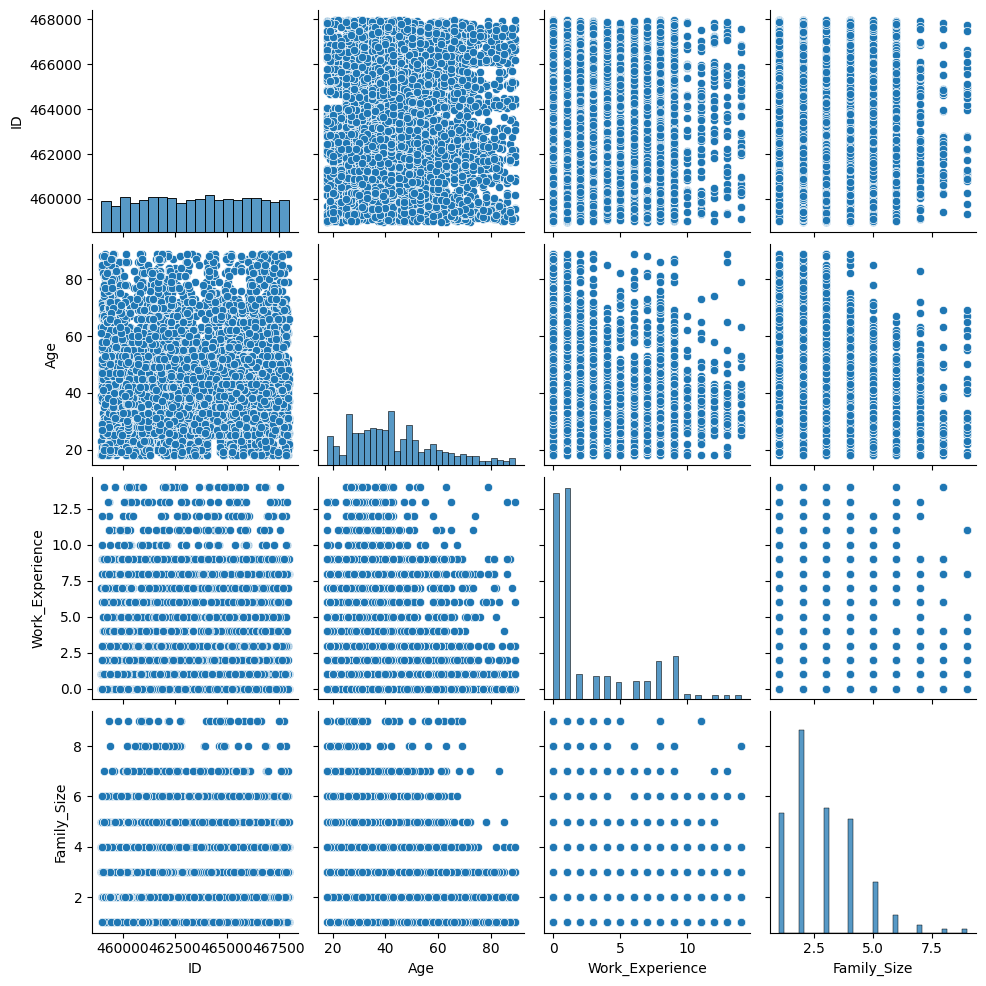

In [18]:
sns.pairplot(CS)

**This command displays the first 5 rows of the DataFrame "CS".**

In [19]:
CS.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C


**This command returns the column labels of the DataFrame "CS".**

In [20]:
CS.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

**This code performs one-hot encoding on categorical variables "Gender", "Profession", "Spending_Score", and "Var_1" in the DataFrame "CS" and concatenates the resulting dummy variables with the original DataFrame. Then, it displays the first 5 rows of the modified DataFrame "CS" with the encoded variables.**

In [21]:
CS = pd.concat([CS, pd.get_dummies(CS["Gender"]).astype(int)], axis=1)
CS = pd.concat([CS, pd.get_dummies(CS["Profession"]).astype(int)], axis=1)
CS = pd.concat([CS, pd.get_dummies(CS["Spending_Score"]).astype(int)], axis=1)
CS = pd.concat([CS, pd.get_dummies(CS["Var_1"]).astype(int)], axis=1)

CS.head(5)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,...,Average,High,Low,Cat_1,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,...,0,0,1,0,0,0,1,0,0,0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,...,0,1,0,0,0,0,0,0,1,0
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,...,1,0,0,0,0,0,0,0,1,0
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,...,0,0,1,0,0,0,0,0,1,0


**This code applies one-hot encoding to the columns "Ever_Married" and "Graduated" in the DataFrame "CS" and then displays the first 5 rows of the modified DataFrame with the encoded variables.**

In [22]:
CS = pd.get_dummies(CS, columns=["Ever_Married", "Graduated"])

CS.head(5)

,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Female,...,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes
0,462809,Male,22,Healthcare,1.0,Low,4.0,Cat_4,D,0,...,0,0,1,0,0,0,True,False,True,False
2,466315,Female,67,Engineer,1.0,Low,1.0,Cat_6,B,1,...,0,0,0,0,1,0,False,True,False,True
3,461735,Male,67,Lawyer,0.0,High,2.0,Cat_6,B,0,...,0,0,0,0,1,0,False,True,False,True
5,461319,Male,56,Artist,0.0,Average,2.0,Cat_6,C,0,...,0,0,0,0,1,0,False,True,True,False
6,460156,Male,32,Healthcare,1.0,Low,3.0,Cat_6,C,0,...,0,0,0,0,1,0,True,False,False,True


**This code converts the columns "Ever_Married_No", "Ever_Married_Yes", "Graduated_No", and "Graduated_Yes" in the DataFrame "CS" from boolean type to integer type (0 for False, 1 for True), and then displays the first 5 rows of the modified DataFrame.**

In [23]:
CS["Ever_Married_No"] = CS["Ever_Married_No"].astype(int)
CS["Ever_Married_Yes"] = CS["Ever_Married_Yes"].astype(int)
CS["Graduated_No"] = CS["Graduated_No"].astype(int)
CS["Graduated_Yes"] = CS["Graduated_Yes"].astype(int)

CS.head(5)

,ID,Gender,Age,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation,Female,...,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes
0,462809,Male,22,Healthcare,1.0,Low,4.0,Cat_4,D,0,...,0,0,1,0,0,0,1,0,1,0
2,466315,Female,67,Engineer,1.0,Low,1.0,Cat_6,B,1,...,0,0,0,0,1,0,0,1,0,1
3,461735,Male,67,Lawyer,0.0,High,2.0,Cat_6,B,0,...,0,0,0,0,1,0,0,1,0,1
5,461319,Male,56,Artist,0.0,Average,2.0,Cat_6,C,0,...,0,0,0,0,1,0,0,1,1,0
6,460156,Male,32,Healthcare,1.0,Low,3.0,Cat_6,C,0,...,0,0,0,0,1,0,1,0,0,1


**This code drops the columns "Gender", "Profession", "Spending_Score", and "Var_1" from the DataFrame "CS", and then displays the first 5 rows of the modified DataFrame.**

In [24]:
CS = CS.drop(columns=["Gender", "Profession", "Spending_Score", "Var_1"])

CS.head(5)

,ID,Age,Work_Experience,Family_Size,Segmentation,Female,Male,Artist,Doctor,Engineer,...,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes
0,462809,22,1.0,4.0,D,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,466315,67,1.0,1.0,B,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,461735,67,0.0,2.0,B,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,461319,56,0.0,2.0,C,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
6,460156,32,1.0,3.0,C,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1


**This code uses "LabelEncoder" from scikit-learn to encode the "Segmentation" column in the DataFrame "CS" into numerical labels, and then displays the first 5 rows of the DataFrame with the encoded "Segmentation" column.**

In [25]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

CS["Segmentation"] = label_encoder.fit_transform(CS["Segmentation"])

CS.head(5)

,ID,Age,Work_Experience,Family_Size,Segmentation,Female,Male,Artist,Doctor,Engineer,...,Cat_2,Cat_3,Cat_4,Cat_5,Cat_6,Cat_7,Ever_Married_No,Ever_Married_Yes,Graduated_No,Graduated_Yes
0,462809,22,1.0,4.0,3,0,1,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,466315,67,1.0,1.0,1,1,0,0,0,1,...,0,0,0,0,1,0,0,1,0,1
3,461735,67,0.0,2.0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
5,461319,56,0.0,2.0,2,0,1,1,0,0,...,0,0,0,0,1,0,0,1,1,0
6,460156,32,1.0,3.0,2,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,1


**This code selects specific columns from the DataFrame "CS" and creates a correlation matrix based on these selected columns. Then, it uses Seaborn's "heatmap" function to visualize the correlation matrix with annotations, using a "coolwarm" color map and adding linewidths. Finally, it displays the heatmap.**

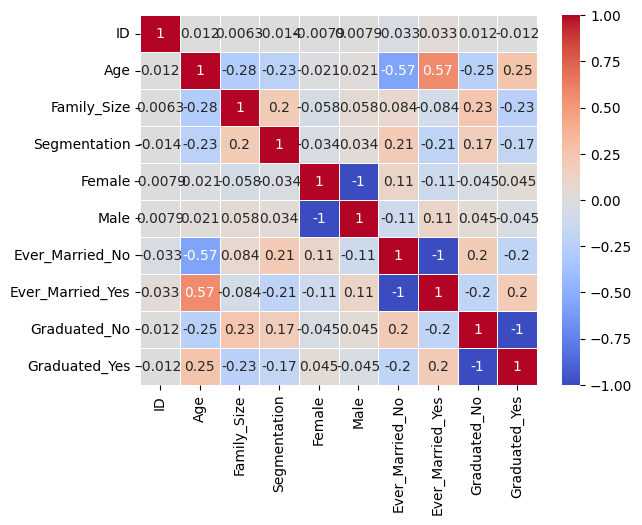

In [26]:
selected_columns = ['ID', 'Age', 'Family_Size', 'Segmentation', 'Female', 'Male', "Ever_Married_No", "Ever_Married_Yes", "Graduated_No", "Graduated_Yes"]
subset_CS = CS[selected_columns]

correlation_matrix = subset_CS.corr()

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

plt.show()

**This command returns the column labels of the DataFrame "CS".**

In [27]:
CS.columns

Index(['ID', 'Age', 'Work_Experience', 'Family_Size', 'Segmentation', 'Female',
       'Male', 'Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Average', 'High',
       'Low', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7',
       'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes'],
      dtype='object')

# **Model Building**

**X: Contains selected features including demographic information, profession, spending score, Var_1 categories, and marital/educational status.**

**y: Represents the target variable "Segmentation" for classification.**

In [28]:
X = CS[['ID', 'Age', 'Work_Experience', 'Family_Size', 'Female',
       'Male', 'Artist', 'Doctor', 'Engineer', 'Entertainment', 'Executive',
       'Healthcare', 'Homemaker', 'Lawyer', 'Marketing', 'Average', 'High',
       'Low', 'Cat_1', 'Cat_2', 'Cat_3', 'Cat_4', 'Cat_5', 'Cat_6', 'Cat_7',
       'Ever_Married_No', 'Ever_Married_Yes', 'Graduated_No', 'Graduated_Yes']]

y = CS["Segmentation"]

**This command imports the "train_test_split" function from the scikit-learn library, which is used to split datasets into training and testing sets for machine learning models.**

In [29]:
from sklearn.model_selection import train_test_split

**This code splits the features (X) and target variable (y) into training and testing sets, with 80% of the data allocated for training and 20% for testing, using the "train_test_split" function from scikit-learn.**

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

**1: The code imports the Linear Regression model from scikit-learn, a popular Python library for machine learning tasks.**

**2: It initializes a Linear Regression model object named LR with specific parameters like fitting intercept and number of jobs to run in parallel.**

**3: The model is trained (fitted) on the training data (X_train, y_train) using the fit method, which learns the relationship between features and target variable.**

**4: After training, the model makes predictions on the testing data (X_test) using the predict method, generating predicted values for the target variable (y_pred).**

**5: The training and testing accuracies of the Linear Regression model are calculated using the score method, which measures the coefficient of determination (R-squared) between the predicted and actual target values. The results are printed to evaluate the model's performance.**

In [31]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression(fit_intercept = True, n_jobs = -1)

LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)

LR_Training_Accuracy = round(LR.score(X_train, y_train) * 100, 2)
print("Linear Regression Training Accuracy: ", round(LR_Training_Accuracy, 2), "%")

LR_Testing_Accuracy = round(LR.score(X_test, y_test) * 100, 2)
print("Linear Regression Testing Accuracy: ", round(LR_Testing_Accuracy, 2), "%")

Linear Regression Training Accuracy:  18.42 %
Linear Regression Testing Accuracy:  16.62 %


**1: The code imports the Logistic Regression model from scikit-learn, a widely used algorithm for binary and multiclass classification problems.**

**2: It initializes a Logistic Regression model object named LogReg with specific parameters like penalty, regularization strength (C), and solver method.**

**3: The model is trained (fitted) on the training data (X_train, y_train) using the fit method, which learns the relationship between features and target variable for classification.**

**4: After training, the model makes predictions on the testing data (X_test) using the predict method, generating predicted class labels for classification.**

**5: The training and testing accuracies of the Logistic Regression model are calculated using the score method, which measures the accuracy of predicted class labels compared to the actual labels. The results are printed to evaluate the model's performance.**

In [32]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(penalty='l2', C=1.0, solver='liblinear')

LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)

LogReg_Training_Accuracy = round(LogReg.score(X_train, y_train) * 100, 2)
print("Logistic Regression Training Accuracy: ", round(LogReg_Training_Accuracy, 2), "%")

LogReg_Testing_Accuracy = round(LogReg.score(X_test, y_test) * 100, 2)
print("Logistic Regression Testing Accuracy: ", round(LogReg_Testing_Accuracy, 2), "%")

Logistic Regression Training Accuracy:  26.48 %
Logistic Regression Testing Accuracy:  25.88 %


**1: The code imports the Random Forest Classifier from scikit-learn, which is an ensemble learning method based on decision tree classifiers.**

**2: It initializes a Random Forest Classifier object named RFC with specific parameters, such as the number of trees (n_estimators) in the forest.**

**3: The model is trained (fitted) on the training data (X_train, y_train) using the fit method, which constructs multiple decision trees based on random subsets of the training data.**

**4: After training, the model makes predictions on the testing data (X_test) using the predict method, generating predicted class labels for classification.**

**5: The training and testing accuracies of the Random Forest Classifier model are calculated using the score method, which measures the accuracy of predicted class labels compared to the actual labels. The results are printed to evaluate the model's performance.**

In [35]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(n_estimators=500)

RFC.fit(X_train, y_train)

y_pred = RFC.predict(X_test)

RFC_Training_Accuracy = round(RFC.score(X_train, y_train) * 100, 2)
print("Random Forest Training Accuracy: ", round(RFC_Training_Accuracy, 2), "%")

RFC_Testing_Accuracy = round(RFC.score(X_test, y_test) * 100, 2)
print("Random Forest Testing Accuracy: ", round(RFC_Testing_Accuracy, 2), "%")

Random Forest Training Accuracy:  100.0 %
Random Forest Testing Accuracy:  52.29 %


**1: The code imports the Decision Tree Classifier from scikit-learn, a predictive modeling algorithm that learns simple decision rules inferred from the data features.**

**2: It initializes a Decision Tree Classifier object named DTC with specific parameters, such as the criterion for quality of split (gini), the strategy used to choose the split at each node (best), and the maximum depth of the tree (100).**

**3: The model is trained (fitted) on the training data (X_train, y_train) using the fit method, which constructs a decision tree based on the training data.**

**4: After training, the model makes predictions on the testing data (X_test) using the predict method, generating predicted class labels for classification.**

**5: The training and testing accuracies of the Decision Tree Classifier model are calculated using the score method, which measures the accuracy of predicted class labels compared to the actual labels. The results are printed to evaluate the model's performance.**

In [37]:
from sklearn.tree import DecisionTreeClassifier

DTC = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=10)

DTC.fit(X_train, y_train)

y_pred = DTC.predict(X_test)

DTC_Training_Accuracy = round(DTC.score(X_train, y_train) * 100, 2)
print("Decision Tree Training Accuracy: ", round(DTC_Training_Accuracy, 2), "%")

DTC_Testing_Accuracy = round(DTC.score(X_test, y_test) * 100, 2)
print("Decision Tree Testing Accuracy: ", round(DTC_Testing_Accuracy, 2), "%")

Decision Tree Training Accuracy:  67.29 %
Decision Tree Testing Accuracy:  49.59 %


# **Conclusion:**

*Linear Regression Training Accuracy:  18.42 %*

*Linear Regression Testing Accuracy:  16.62 %*

*Logistic Regression Training Accuracy:  26.48 %*

*Logistic Regression Testing Accuracy:  25.88 %*

*Random Forest Training Accuracy:  100.0 %*

*Random Forest Testing Accuracy:  52.29 %*

*Decision Tree Training Accuracy:  67.29 %*

*Decision Tree Testing Accuracy:  49.59 %*


***We tested several ML models, including Linear Regression, Logistic Regression, Random Forest, and Decision Tree. The regression models performed poorly, and Random Forest showed overfitting with 100% training accuracy but low testing accuracy. The Decision Tree Classifier provided the most balanced and reliable results, making it the best choice for this project.***

# **Save Model**

**This code serializes (pickles) the trained Random Forest Classifier model ("RFC") and saves it to a file named "Finalized-Model.pickle" using Python's pickle module.**

In [38]:
import pickle

with open("Finalized-Model.pickle", "wb") as file:
    pickle.dump(DTC, file)